In [32]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import tensorflow as tf
tf.__version__


'2.6.0'

In [2]:
import keras
keras.__version__

'2.6.0'

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10752307944451488098
]


In [5]:
with tf.device("/device:GPU:0"):
    print("tf.keras code in this scope will run on GPU")



tf.keras code in this scope will run on GPU


In [6]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


In [7]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
import csv
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from google.colab import files

In [5]:
# sign_mnist_train.csv
#this requires pip install gdown (anaconda powershell)
#!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR   
# sign_mnist_test.csv
#!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion  
    with open(filename) as training_file:
        ### START CODE HERE
        
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')

        ### END CODE HERE
    return images, labels


training_images, training_labels = get_data('./sign_mnist_train.csv')
testing_images, testing_labels = get_data('./sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [6]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3) ### YOUR CODE HERE
testing_images = np.expand_dims(testing_images, axis=3) ### YOUR CODE HERE

train_datagen = ImageDataGenerator(
    ### YOUR CODE HERE
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )


validation_datagen = ImageDataGenerator(
    ### YOUR CODE HERE
    rescale=1. / 255
    )

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D


def test_device (device_name: str, ep):
    with tf.device(device_name):
        model = tf.keras.models.Sequential([
            ### START CODE HERE                                
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(26, activation=tf.nn.softmax)]
            ### END CODE HERE
            )

        #model.compile(optimizer = tf.optimizers.Adam(), 
        model.compile(optimizer = 'adam',
                      loss = 'sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=16), ### YOUR CODE HERE)
                                      steps_per_epoch=len(training_images) / 16,
                                      epochs=ep,
                                      validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=16),
                                      validation_steps=len(testing_images) / 16)

        model.evaluate(testing_images, testing_labels)

# The output from model.evaluate should be close to:
# [6.92426086682151, 0.56609035]


In [ ]:
test_device("/cpu:0", ep=3)

In [73]:
test_device("/cpu:0", ep=3)

Epoch 1/3
1715/1715 [==============================] - 18s 10ms/step - loss: 2.6806 - accuracy: 0.1779 - val_loss: 1.7948 - val_accuracy: 0.4403
Epoch 2/3
1715/1715 [==============================] - 18s 10ms/step - loss: 1.9109 - accuracy: 0.3907 - val_loss: 1.1632 - val_accuracy: 0.6076
Epoch 3/3
225/225 [==============================] - 2s 7ms/step - loss: 202.9608 - accuracy: 0.4718


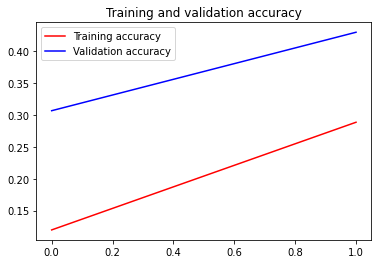

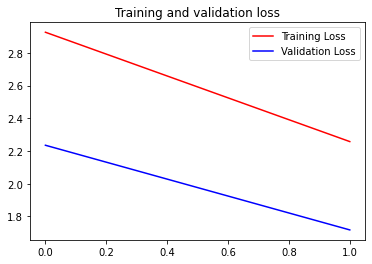

In [60]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy'] ### YOUR CODE HERE
val_acc = history.history['val_accuracy'] ### YOUR CODE HERE
loss = history.history['loss'] ### YOUR CODE HERE
val_loss = history.history['val_loss'] ### YOUR CODE HERE

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()